# Task 3 - Qiskit Aer Simulator

Tasks 1 and 2 only involve visualizing the states and the circuits using Qiskit.
To view the results of measurements, we need a simulator to run those circuits. Qiskit Aer is a powerful simulator for that matter.

In [1]:
# Add imports here, no code other than imports in this cell

from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'dict'

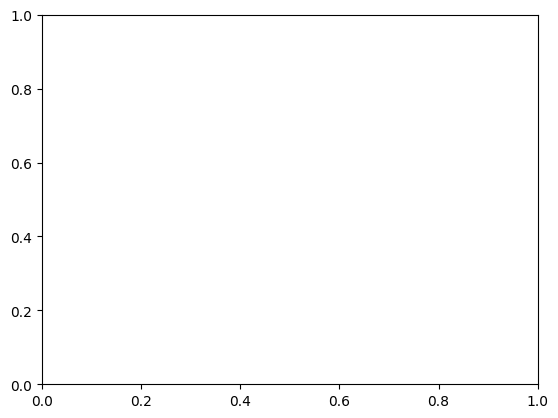

In [ ]:
# Task 3.1 - Create a Bell pair circuit. Add measurements to all qubits.
# Take shots=10,000 and use all methods ('statevector', 'stabilizer', 'extended_stabilizer', 'density_matrix', 'matrix_product_state') to run the circuit and get the counts.
# Plot the counts in one histogram.
# Note: Some methods may take longer time to run.

qc_bell = QuantumCircuit(3)

qc_bell.h(0)

qc_bell.cx(0,1)

qc_bell.cx(0,2)

qc_bell.measure_all()

simulation_methods = ['statevector', 'stabilizer', 'extended_stabilizer', 'density_matrix', 'matrix_product_state']
counts = {}

for method in simulation_methods:
    simulation = AerSimulator(method = method)

    compiled_circuit = transpile(qc_bell, simulation)

    job = simulation.run(compiled_circuit, shots = 10000)

    result = job.result()

    counts[method] = result.get_counts(0)


histogram = plot_histogram(counts)
histogram.show()

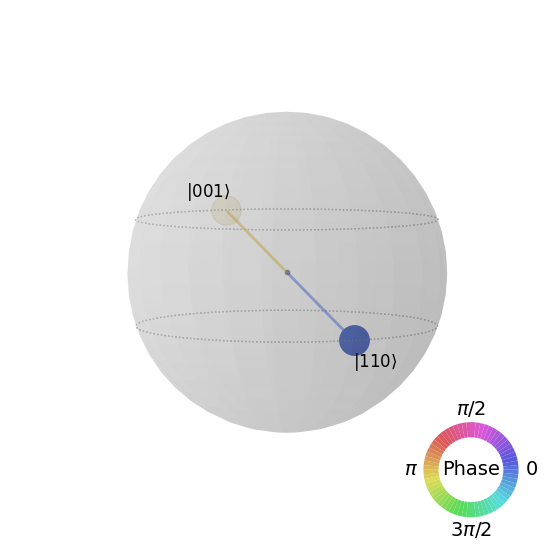

In [2]:
# Task 3.2 - Create a Cat state 1/sqrt(2)(|001> - |110>). Visualize the state using a qsphere.

qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

qc.z(0)

qc.x(0)

sv = Statevector.from_instruction(qc)

sv.draw('qsphere')



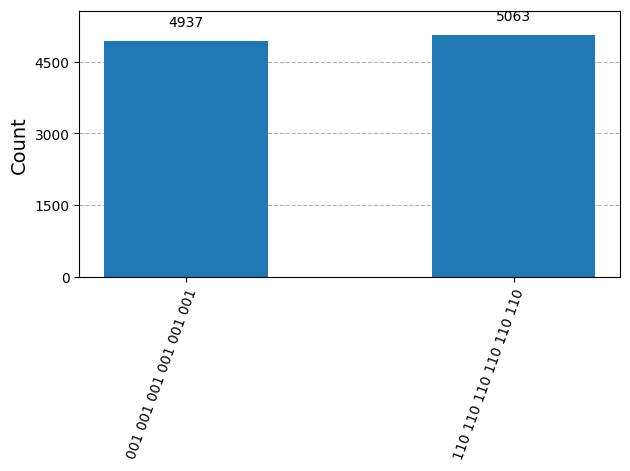

In [8]:
# Task 3.3 - Plot the histogram of the results of Task 3.2 after adding measurements to all qubits and running the circuit with shots=10,000 using density_matrix method.

qc.measure_all()

simulation = AerSimulator(method = 'density_matrix')

compiled_circuit = transpile(qc, simulation)

job = simulation.run(compiled_circuit, shots = 10000)

result = job.result()

plot_histogram(result.get_counts())